<a href="https://colab.research.google.com/github/CharlyPierce/Clustering/blob/main/clust_vin_127.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
dse=pd.read_csv('winequality-red.csv',sep=';')
ds=dse
ds.head(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <a list of 10 Patch objects>)

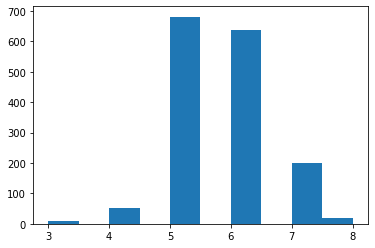

In [ ]:
plt.hist(ds['quality'])

In [ ]:
ds.groupby('quality').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


In [ ]:
len(ds.columns)

12

In [ ]:
for n in ds.columns:
  print(n+':',pd.isnull(ds[n]).sum())

fixed acidity: 0
volatile acidity: 0
citric acid: 0
residual sugar: 0
chlorides: 0
free sulfur dioxide: 0
total sulfur dioxide: 0
density: 0
pH: 0
sulphates: 0
alcohol: 0
quality: 0


In [ ]:
ds_norm=(ds-ds.min())/(ds.max()-ds.min())
ds_norm.head(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.39726,0.0,0.068493,0.106845,0.140845,0.09894,0.567548,0.606299,0.137725,0.153846,0.4


In [ ]:
#clustering Jerarqico skleran=scikit-leran
from sklearn.cluster import AgglomerativeClustering
clus=AgglomerativeClustering(n_clusters=6,linkage='ward')
clus.fit(ds_norm)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=6)

In [ ]:
md=pd.Series(clus.labels_)

Text(0, 0.5, 'Frecuencia de vinos en el cluster')

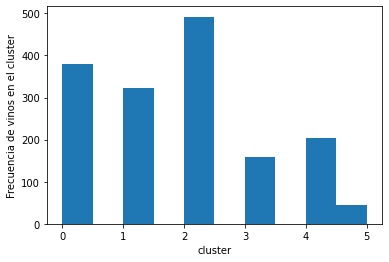

In [ ]:
plt.hist(md)
plt.xlabel('cluster')
plt.ylabel('Frecuencia de vinos en el cluster')

In [ ]:
clus.children_

array([[   0,    4],
       [ 135,  140],
       [ 750,  751],
       ...,
       [3179, 3191],
       [3192, 3193],
       [3194, 3195]])

In [ ]:
from scipy.cluster.hierarchy import dendrogram,linkage
z=linkage(ds_norm,'ward')

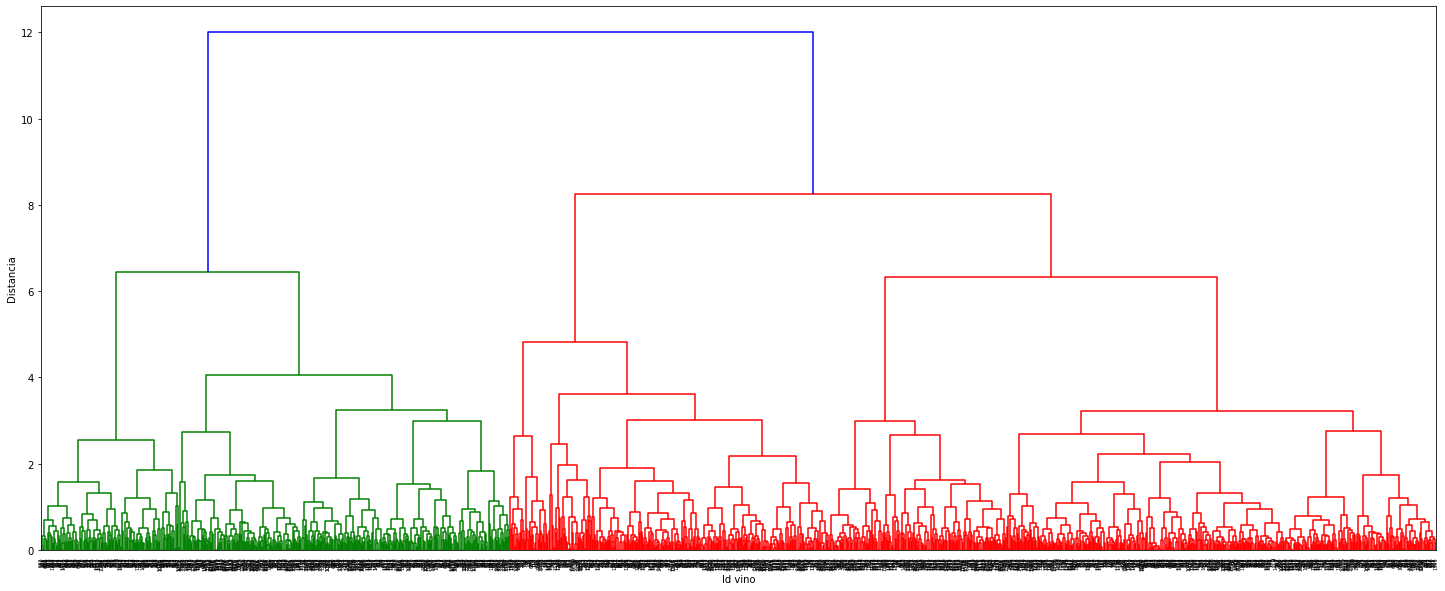

In [ ]:
plt.figure(figsize=(25,10))
plt.xlabel('Id vino')
plt.ylabel('Distancia')
den=dendrogram(z)

In [ ]:
#k-Means
from sklearn.cluster import KMeans

In [ ]:
c=KMeans(n_clusters=6)
c.fit(ds_norm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
r=[]
for i in range(1,12):
  cl=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10)
  cl.fit(ds_norm)
  r.append(cl.inertia_)

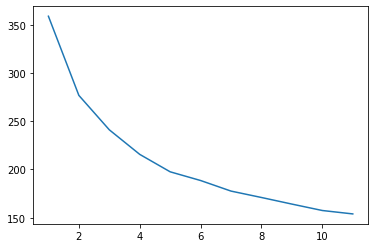

In [ ]:
plt.plot(range(1,12),r)

In [ ]:
c.cluster_centers_#varicentros

array([[0.32987489, 0.28412848, 0.48758621, 0.07416155, 0.54953658,
        0.21369597, 0.2114049 , 0.51240569, 0.23486288, 0.59281437,
        0.16127321, 0.46896552],
       [0.31715582, 0.27783076, 0.30427215, 0.15239726, 0.1271053 ,
        0.37992512, 0.29702107, 0.54049099, 0.43603608, 0.17897749,
        0.2129828 , 0.4556962 ],
       [0.37144677, 0.15928549, 0.43060606, 0.10720216, 0.1068068 ,
        0.16533291, 0.08425688, 0.41513149, 0.41687545, 0.23741154,
        0.49050117, 0.69772727],
       [0.26346299, 0.35794972, 0.12242248, 0.09143703, 0.12264951,
        0.14519871, 0.10732188, 0.49048225, 0.48663248, 0.15506197,
        0.22241602, 0.44069767],
       [0.57844577, 0.20521602, 0.50376518, 0.13132938, 0.12994667,
        0.13480071, 0.09101443, 0.65710702, 0.33274889, 0.22475696,
        0.28344233, 0.54493927],
       [0.17476901, 0.32234023, 0.09568282, 0.09362742, 0.09590875,
        0.25057393, 0.12580751, 0.32248507, 0.57761282, 0.18610356,
        0.49077149,

In [ ]:
c.inertia_#factor de eficencia

186.58792081596556

In [ ]:
c.labels_#categoria a los que pertenece

In [ ]:
ds_norm['cluster_k']=c.labels_
ds_norm['cluster_h']=clus.labels_

In [ ]:
c.labels_#cluster al que pertenece

array([3, 3, 3, ..., 5, 5, 2], dtype=int32)

In [ ]:
ds_norm.head(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,cluster,cluster_k,cluster_h
0,0.247788,0.39726,0.0,0.068493,0.106845,0.140845,0.09894,0.567548,0.606299,0.137725,0.153846,0.4,3,3,2


(array([ 29.,   0., 316.,   0., 264.,   0., 516.,   0., 247., 227.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

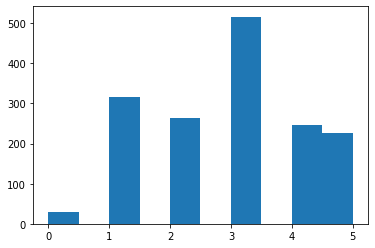

In [ ]:
plt.hist(ds_norm['cluster_k'])

(array([379.,   0., 322.,   0., 492.,   0., 158.,   0., 204.,  44.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

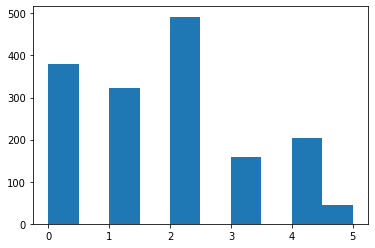

In [ ]:
plt.hist(ds_norm['cluster_h'])

In [ ]:
c.cluster_centers_#centroides

array([[0.32987489, 0.28412848, 0.48758621, 0.07416155, 0.54953658,
        0.21369597, 0.2114049 , 0.51240569, 0.23486288, 0.59281437,
        0.16127321, 0.46896552],
       [0.31715582, 0.27783076, 0.30427215, 0.15239726, 0.1271053 ,
        0.37992512, 0.29702107, 0.54049099, 0.43603608, 0.17897749,
        0.2129828 , 0.4556962 ],
       [0.37144677, 0.15928549, 0.43060606, 0.10720216, 0.1068068 ,
        0.16533291, 0.08425688, 0.41513149, 0.41687545, 0.23741154,
        0.49050117, 0.69772727],
       [0.26346299, 0.35794972, 0.12242248, 0.09143703, 0.12264951,
        0.14519871, 0.10732188, 0.49048225, 0.48663248, 0.15506197,
        0.22241602, 0.44069767],
       [0.57844577, 0.20521602, 0.50376518, 0.13132938, 0.12994667,
        0.13480071, 0.09101443, 0.65710702, 0.33274889, 0.22475696,
        0.28344233, 0.54493927],
       [0.17476901, 0.32234023, 0.09568282, 0.09362742, 0.09590875,
        0.25057393, 0.12580751, 0.32248507, 0.57761282, 0.18610356,
        0.49077149,

In [ ]:
c.inertia_#suma de distancias de cada varicentro

186.58792081596556

In [ ]:
#interpretacion Final
#los que pertenecen al mismo cluster deberian tener precio final
#premedio de cada cluster
#ds_norm=ds_norm.drop('cluster',axis=1)
ds_norm.groupby('cluster_k').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,cluster_h
cluster_k,,,,,,,,,,,,,
0,0.329875,0.284128,0.487586,0.074162,0.549537,0.213696,0.211405,0.512406,0.234863,0.592814,0.161273,0.468966,4.896552
1,0.317156,0.277831,0.304272,0.152397,0.127105,0.379925,0.297021,0.540491,0.436036,0.178977,0.212983,0.455696,1.047468
2,0.371447,0.159285,0.430606,0.107202,0.106807,0.165333,0.084257,0.415131,0.416875,0.237412,0.490501,0.697727,0.102273
3,0.263463,0.357950,0.122422,0.091437,0.122650,0.145199,0.107322,0.490482,0.486632,0.155062,0.222416,0.440698,2.001938
4,0.578446,0.205216,0.503765,0.131329,0.129947,0.134801,0.091014,0.657107,0.332749,0.224757,0.283442,0.544939,2.064777
5,0.174769,0.322340,0.095683,0.093627,0.095909,0.250574,0.125808,0.322485,0.577613,0.186104,0.490771,0.613216,3.405286
